# Convolutional Neural Networks

Ejercicio descrito en en http://blog.hadsonpar.com/ - reconocimiento de imágenes.

# Importar Librerías

In [26]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [27]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

# Cargar set de Imágenes

In [28]:
dirname = os.path.join(os.getcwd(), 'ninhosimages')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

#print("leyendo imagenes de niños ", imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            #print (b, end="\r")
            if prevRoot !=root:
                #print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print("Directorios leidos: ",len(directories))
print("Imagenes en cada directorio: ", dircount)
print("Total de imagenes en subdirectorio: ",sum(dircount))

Directorios leidos:  2
Imagenes en cada directorio:  [7, 4]
Total de imagenes en subdirectorio:  11


# Creamos las etiquetas

In [29]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  11


In [30]:
ninhos=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    ninhos.append(name[len(name)-1])
    indice=indice+1

0 nihna
1 nihno


In [31]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy uint8

# Buscar los números únicos de las etiquetas del aprendizaje
classes = np.unique(y)
nClasses = len(classes)
print('Total de outputs : ', nClasses)
print('Output classes : ', classes)

Total de outputs :  2
Output classes :  [0 1]


# Creamos Sets de Entrenamiento y Test

In [32]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Datos de aprendizaje : ', train_X.shape, train_Y.shape)
print('Testing de aprendizaje : ', test_X.shape, test_Y.shape)

Datos de aprendizaje :  (8, 21, 28, 3) (8,)
Testing de aprendizaje :  (3, 21, 28, 3) (3,)


Text(0.5, 1.0, 'Ground Truth : 0')

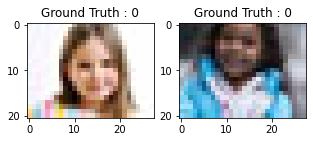

In [33]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [34]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [35]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Etiqueta original:', train_Y[0])
print('Después de la conversión a one-hot:', train_Y_one_hot[0])

Etiqueta original: 0
Después de la conversión a one-hot: [1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [36]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [37]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(6, 21, 28, 3) (2, 21, 28, 3) (6, 2) (2, 2)


# Creamos el modelo de CNN

In [38]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [39]:
ninhos_model = Sequential()
ninhos_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
ninhos_model.add(LeakyReLU(alpha=0.1))
ninhos_model.add(MaxPooling2D((2, 2),padding='same'))
ninhos_model.add(Dropout(0.5))

ninhos_model.add(Flatten())
ninhos_model.add(Dense(32, activation='linear'))
ninhos_model.add(LeakyReLU(alpha=0.1))
ninhos_model.add(Dropout(0.5))
ninhos_model.add(Dense(nClasses, activation='softmax'))

In [40]:
ninhos_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 21, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4928)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                157728    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32)               

In [41]:
ninhos_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [42]:
# Iniciar entrenamiento 
# Este paso puede tomar varios minutos, dependiendo del cpu y memoria ram
ninhos_train = ninhos_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/6
1/1 [==============================] - 0s 132ms/step - loss: 0.7350 - accuracy: 0.5000 - val_loss: 0.6111 - val_accuracy: 1.0000
Epoch 2/6
1/1 [==============================] - 0s 15ms/step - loss: 0.5018 - accuracy: 0.6667 - val_loss: 0.6088 - val_accuracy: 1.0000
Epoch 3/6
1/1 [==============================] - 0s 16ms/step - loss: 0.6549 - accuracy: 0.6667 - val_loss: 0.6087 - val_accuracy: 0.5000
Epoch 4/6
1/1 [==============================] - 0s 16ms/step - loss: 0.6431 - accuracy: 0.6667 - val_loss: 0.6111 - val_accuracy: 0.5000
Epoch 5/6
1/1 [==============================] - 0s 15ms/step - loss: 0.4676 - accuracy: 0.6667 - val_loss: 0.6237 - val_accuracy: 0.5000
Epoch 6/6
1/1 [==============================] - 0s 17ms/step - loss: 0.5994 - accuracy: 0.8333 - val_loss: 0.6328 - val_accuracy: 0.5000


In [43]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
ninhos_model.save("ninhos_mnist.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ninhos_mnist.h5py\assets


# Evaluamos la red

In [44]:
test_eval = ninhos_model.evaluate(test_X, test_Y_one_hot, verbose=1)

1/1 [==============================] - 0s 984us/step - loss: 1.0412 - accuracy: 0.3333


In [45]:
print('TEST:')
print('Perdida:', test_eval[0])
print('Exactitud:', test_eval[1])

TEST:
Perdida: 1.041202425956726
Exactitud: 0.3333333432674408


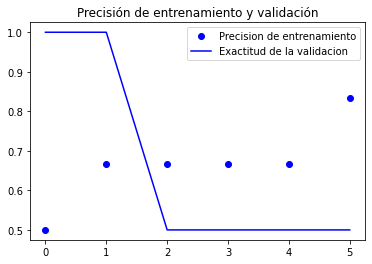

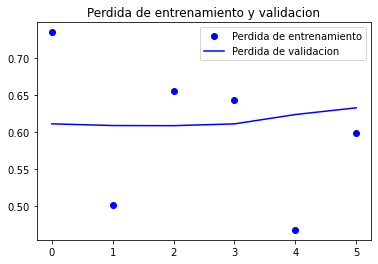

In [46]:
accuracy = ninhos_train.history['accuracy']
val_accuracy = ninhos_train.history['val_accuracy']
loss = ninhos_train.history['loss']
val_loss = ninhos_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Precision de entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Exactitud de la validacion')
plt.title('Precisión de entrenamiento y validación')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Perdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Perdida de validacion')
plt.title('Perdida de entrenamiento y validacion')
plt.legend()
plt.show()

In [48]:
predicted_classes2 = ninhos_model.predict(test_X)

In [49]:
predicted_classes=[]
for predicted_ninhos in predicted_classes2:
    predicted_classes.append(predicted_ninhos.tolist().index(max(predicted_ninhos)))
predicted_classes=np.array(predicted_classes)

In [50]:
predicted_classes.shape, test_Y.shape

((3,), (3,))

# Aprender de los errores: Mejorar la CNN

Se econtraron 1 etiquetascorrectas


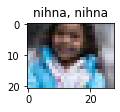

In [51]:
correct = np.where(predicted_classes==test_Y)[0]
print("Se econtraron %d etiquetas correctas" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(ninhos[predicted_classes[correct]],
                                                    ninhos[test_Y[correct]]))

    plt.tight_layout()

Se econtraron 2 etiquetas correctas


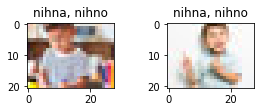

In [53]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Se econtraron %d etiquetas correctas" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(ninhos[predicted_classes[incorrect]],
                                                    ninhos[test_Y[incorrect]]))
    plt.tight_layout()

In [54]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.33      1.00      0.50         1
     Class 1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

C:\Anaconda3\envs\tensorflow01\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\envs\tensorflow01\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\envs\tensorflow01\

# Prediccion de una nueva imagen

In [70]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['test/nihna_0001.jpg','test/nihna_0002.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    .append(image_resized)

X = np.array(, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = ninhos_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], ninhos[img_tagged.tolist().index(max(img_tagged))])

SyntaxError: invalid syntax (<ipython-input-70-9edb7589a130>, line 10)